In [ ]:
from google.colab import drive


drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/


/content/drive/MyDrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

 Assignment8/            facenet_keras.h5          'Untitled document.gdoc'
 ColabNotebooks/         facenet_keras_weights.h5   yolov3/
'Colab Notebooks'/       sample_data/               yolov3.weights
'facenet_keras (1).h5'   Selected_images/           yolov3-wider_16000.weights


In [ ]:
!git clone https://github.com/ultralytics/yolov3
!pip install -r yolov3/requirements.txt
!pip install facenet-pytorch

Cloning into 'yolov3'...
remote: Enumerating objects: 9993, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9993 (delta 0), reused 3 (delta 0), pack-reused 9988
Receiving objects: 100% (9993/9993), 9.32 MiB | 28.41 MiB/s, done.
Resolving deltas: 100% (6737/6737), done.
     |████████████████████████████████| 596 kB 5.1 MB/s 
     |████████████████████████████████| 1.8 MB 47.1 MB/s 
     |████████████████████████████████| 181 kB 47.0 MB/s 
     |████████████████████████████████| 144 kB 57.1 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=fac87a89248dcc0f786e807fb31f300d4c8202f71fda9f5228750376408dce5e
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstall

In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov3', 'yolov3')  # or yolov3-spp, yolov3-tiny, custom

# Images
img = '004769.jpg'  # or file, Path, PIL, OpenCV, numpy, list

Using cache found in /root/.cache/torch/hub/ultralytics_yolov3_master
YOLOv3 🚀 2022-4-11 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
cd sample_data

/content/drive/MyDrive/sample_data


In [ ]:
# Inference
results = model("028426.jpg")

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
image 1/1: 1185x800 1 person
Speed: 44.0ms pre-process, 1918.3ms inference, 1.7ms NMS per image at shape (1, 3, 640, 448)


In [ ]:
results.show()

In [ ]:
crop_result = results.crop()

Saved 1 image to runs/detect/exp6
Saved results to runs/detect/exp6



In [ ]:
arr = crop_result[0]['im']
from PIL import Image
import numpy as np

arr = np.flip(arr, axis=-1)
PIL_image = Image.fromarray(np.uint8(arr)).convert('RGB')
PIL_image.save("crop_face_4.jpg")

In [ ]:
arr.shape

(1185, 800, 3)

In [ ]:
from PIL import Image
im = Image.fromarray(arr).convert('RGB')
im.save("crop_face4-1.jpg")

In [ ]:
PIL_image.size

(800, 1185)

In [ ]:
PIL_image.show()

In [ ]:
results

In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=1200)

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [ ]:
# Get cropped and prewhitened image tensor
img_cropped = mtcnn(PIL_image, save_path='mtcnn_crop.jpg')

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding = resnet(img_cropped.unsqueeze(0))

In [ ]:
img_embedding.shape

torch.Size([1, 512])

In [ ]:
! git clone https://github.com/sthanhng/yoloface
! git clone https://github.com/timesler/facenet-pytorch.git facenet_pytorch

Cloning into 'yoloface'...
remote: Enumerating objects: 155, done.
remote: Total 155 (delta 0), reused 0 (delta 0), pack-reused 155
Receiving objects: 100% (155/155), 1.40 MiB | 10.44 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Cloning into 'facenet_pytorch'...
remote: Enumerating objects: 1267, done.
remote: Total 1267 (delta 0), reused 0 (delta 0), pack-reused 1267
Receiving objects: 100% (1267/1267), 22.88 MiB | 12.78 MiB/s, done.
Resolving deltas: 100% (620/620), done.


In [ ]:
! bash +x yoloface/model-weights/get_models.sh

*** Downloading the trained models...
will be placed in the single file you specified.

--2022-04-11 09:40:39--  https://docs.google.com/uc?export=download&confirm=t&id=13gFDLFhhBqwMw6gf8jVUvNDH2UrgCCrX
Resolving docs.google.com (docs.google.com)... 108.177.11.100, 108.177.11.113, 108.177.11.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.11.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jdrgnjbl3ld44q42lca0432i862h69r7/1649670000000/08669234846404299145/*/13gFDLFhhBqwMw6gf8jVUvNDH2UrgCCrX?e=download [following]
--2022-04-11 09:40:39--  https://doc-10-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jdrgnjbl3ld44q42lca0432i862h69r7/1649670000000/08669234846404299145/*/13gFDLFhhBqwMw6gf8jVUvNDH2UrgCCrX?e=download
Resolving doc-10-5o-docs.googleusercontent.com (doc-10-5o-docs.googleusercontent.com)... 172.217.193.

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
cd /content/drive/MyDrive/sample_data

/content/drive/MyDrive/sample_data


In [ ]:
from yoloface.image2vect import get_image_vect

In [ ]:
cd /content/drive/MyDrive/sample_data/yoloface/

/content/drive/MyDrive/sample_data/yoloface


In [ ]:
vect = get_image_vect("/content/drive/MyDrive/Selected_images/007472.jpg")
print(vect.shape)

(177, 156, 3)
(177, 156, 3)
(156, 177)
torch.Size([3, 177, 156])
(512,)


In [ ]:
from pathlib import Path
IMAGES_PATH = "/content/drive/MyDrive/1200_images"
images = Path(IMAGES_PATH).glob("*.jpg")
image_strings = [str(p) for p in images]
print(image_strings)

['/content/drive/MyDrive/1200_images/005121.jpg', '/content/drive/MyDrive/1200_images/007242.jpg', '/content/drive/MyDrive/1200_images/009302.jpg', '/content/drive/MyDrive/1200_images/003882.jpg', '/content/drive/MyDrive/1200_images/005559.jpg', '/content/drive/MyDrive/1200_images/006477.jpg', '/content/drive/MyDrive/1200_images/009298.jpg', '/content/drive/MyDrive/1200_images/009563.jpg', '/content/drive/MyDrive/1200_images/005988.jpg', '/content/drive/MyDrive/1200_images/001976.jpg', '/content/drive/MyDrive/1200_images/007386.jpg', '/content/drive/MyDrive/1200_images/003580.jpg', '/content/drive/MyDrive/1200_images/007961.jpg', '/content/drive/MyDrive/1200_images/002877.jpg', '/content/drive/MyDrive/1200_images/006173.jpg', '/content/drive/MyDrive/1200_images/006233.jpg', '/content/drive/MyDrive/1200_images/006645.jpg', '/content/drive/MyDrive/1200_images/007667.jpg', '/content/drive/MyDrive/1200_images/009459.jpg', '/content/drive/MyDrive/1200_images/001332.jpg', '/content/drive/MyD

In [ ]:
vect_dict = {}
processed = set()

In [ ]:
len(processed)

1197

In [ ]:
images = Path("/content/drive/MyDrive/1200_images").glob("*.jpg")
image_strings = [str(p) for p in images]
print(image_strings)

for i in image_strings:
  if i not in processed:
    vect_dict[i] = get_image_vect(i)
    processed.add(i)

print(len(vect_dict))

['/content/drive/MyDrive/1200_images/005121.jpg', '/content/drive/MyDrive/1200_images/007242.jpg', '/content/drive/MyDrive/1200_images/009302.jpg', '/content/drive/MyDrive/1200_images/003882.jpg', '/content/drive/MyDrive/1200_images/005559.jpg', '/content/drive/MyDrive/1200_images/006477.jpg', '/content/drive/MyDrive/1200_images/009298.jpg', '/content/drive/MyDrive/1200_images/009563.jpg', '/content/drive/MyDrive/1200_images/005988.jpg', '/content/drive/MyDrive/1200_images/001976.jpg', '/content/drive/MyDrive/1200_images/007386.jpg', '/content/drive/MyDrive/1200_images/003580.jpg', '/content/drive/MyDrive/1200_images/007961.jpg', '/content/drive/MyDrive/1200_images/002877.jpg', '/content/drive/MyDrive/1200_images/006173.jpg', '/content/drive/MyDrive/1200_images/006233.jpg', '/content/drive/MyDrive/1200_images/006645.jpg', '/content/drive/MyDrive/1200_images/007667.jpg', '/content/drive/MyDrive/1200_images/009459.jpg', '/content/drive/MyDrive/1200_images/001332.jpg', '/content/drive/MyD

In [ ]:
from image_finder import get_matching_images
from image2vect import get_image_vect

#IMAGES_PATH = "/content/drive/MyDrive/1200_images"
#vect_dict = calculate_image_vectors(IMAGES_PATH)
get_matching_images("/content/drive/MyDrive/1200_images/000109.jpg",1,vect_dict)

Processing:  /content/drive/MyDrive/1200_images/000109.jpg
Saved to output0.jpg
[[156, 182, 359, 525]]
156 182 359 525
(525, 359, 3)
torch.Size([3, 160, 160])
23 similar images found
['/content/drive/MyDrive/1200_images/007667.jpg', '/content/drive/MyDrive/1200_images/000109.jpg', '/content/drive/MyDrive/1200_images/014480.jpg', '/content/drive/MyDrive/1200_images/012400.jpg', '/content/drive/MyDrive/1200_images/021705.jpg', '/content/drive/MyDrive/1200_images/021688.jpg', '/content/drive/MyDrive/1200_images/037929.jpg', '/content/drive/MyDrive/1200_images/054804.jpg', '/content/drive/MyDrive/1200_images/048738.jpg', '/content/drive/MyDrive/1200_images/074621.jpg', '/content/drive/MyDrive/1200_images/087368.jpg', '/content/drive/MyDrive/1200_images/083968.jpg', '/content/drive/MyDrive/1200_images/083689.jpg', '/content/drive/MyDrive/1200_images/103242.jpg', '/content/drive/MyDrive/1200_images/107175.jpg', '/content/drive/MyDrive/1200_images/106789.jpg', '/content/drive/MyDrive/1200_ima

In [ ]:
img1=get_image_vect("/content/drive/MyDrive/Selected_images/010346.jpg")
# img2=get_image_vect("Selected_images/181180.jpg")

Processing:  /content/drive/MyDrive/Selected_images/010346.jpg
Saved to output1.jpg
[[115, 48, 61, 75]]
115 48 61 75
(75, 61, 3)
torch.Size([3, 160, 160])


In [ ]:
training_images = dict()
inv_training_dict = dict()
mapping_path= "/content/drive/MyDrive/identity_CelebA.txt"
with open(mapping_path, "r") as f:
    for line in f:
        (key, val) = line.split(maxsplit=1)
        val=val.rstrip('\n')
        training_images[key] = val
        if val in inv_training_dict:

          inv_training_dict[val].append(key)
        else:
          inv_training_dict[val] = [key]

In [ ]:
import os

def get_precision_recall(image_path, vect_dict, inv_training_dict, training_images):
  p = {}
  r = {}
  for threshold in  np.arange(0.1, 2, 0.1):
    predictions = get_matching_images(image_path, threshold, vect_dict)

    current_image = os.path.basename(image_path)
    image_id = training_images[current_image]
    print("image_id: ", image_id)
    matching_images = inv_training_dict[image_id]
    intersection = list(set(matching_images).intersection(set(predictions)))
    print("intersections: ", len(intersection))
    print("matching_images: ", len(matching_images))
    print("predictions: ", len(predictions))
    if not predictions:
      precision = 1
    else:
      precision = len(intersection)/float(len(predictions))
    recall = len(intersection)/float(len(matching_images))
    print("Precision: ", precision, ", Recall: ", recall)
    p[threshold] = precision
    r[threshold] = recall

  return p, r


# **PLOTTING precision and recall curve**

Processing:  /content/drive/MyDrive/1200_images/005121.jpg
Saved to output1.jpg
[[210, 67, 100, 148]]
210 67 100 148
(148, 100, 3)
torch.Size([3, 160, 160])
1 similar images found
image_id:  3960
intersections:  1
matching_images:  30
predictions:  1
Precision:  1.0 , Recall:  0.03333333333333333
Processing:  /content/drive/MyDrive/1200_images/005121.jpg
Saved to output1.jpg
[[210, 67, 100, 148]]
210 67 100 148
(148, 100, 3)
torch.Size([3, 160, 160])
1 similar images found
image_id:  3960
intersections:  1
matching_images:  30
predictions:  1
Precision:  1.0 , Recall:  0.03333333333333333
Processing:  /content/drive/MyDrive/1200_images/005121.jpg
Saved to output1.jpg
[[210, 67, 100, 148]]
210 67 100 148
(148, 100, 3)
torch.Size([3, 160, 160])
1 similar images found
image_id:  3960
intersections:  1
matching_images:  30
predictions:  1
Precision:  1.0 , Recall:  0.03333333333333333
Processing:  /content/drive/MyDrive/1200_images/005121.jpg
Saved to output1.jpg
[[210, 67, 100, 148]]
210 

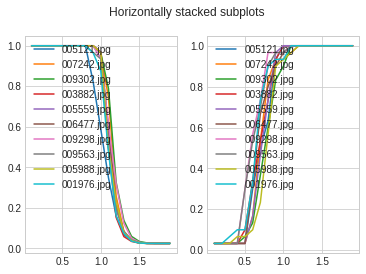

In [ ]:
fig, (p_plot, r_plot) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
precisions_list = []
recalls_list = []

paths = list(Path("/content/drive/MyDrive/1200_images").glob("*.jpg"))[:10]
for i in range(len(paths)):
  path = str(paths[i])
  precisions, recalls = get_precision_recall(path, vect_dict, inv_training_dict, training_images)
  x = list(precisions.keys())
  y = list(precisions.values())
  y2 = list(recalls.values())
  precisions_list.append(y)
  recalls_list.append(y2)
  p_plot.plot(x, y, label=os.path.basename(path))
  r_plot.plot(x, y2, label=os.path.basename(path))

p_plot.legend(loc="upper left")
r_plot.legend(loc="upper left")


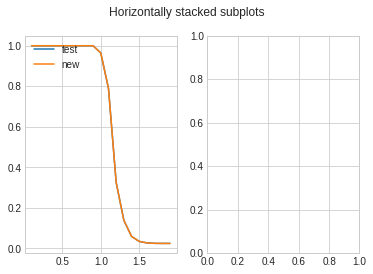

In [ ]:
fig, (p_plot, r_plot) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')

p_plot.plot(x, y, label="test")
p_plot.plot(x, y, label="new")
p_plot.legend(loc="upper left")

In [ ]:

precisions, recalls = get_precision_recall("/content/drive/MyDrive/1200_images/000109.jpg", vect_dict, inv_training_dict, training_images)

Processing:  /content/drive/MyDrive/1200_images/000109.jpg
Saved to output0.jpg
[[156, 182, 359, 525]]
156 182 359 525
(525, 359, 3)
torch.Size([3, 160, 160])
1 similar images found
image_id:  3325
intersections:  1
matching_images:  30
predictions:  1
Precision:  1.0 , Recall:  0.03333333333333333
Processing:  /content/drive/MyDrive/1200_images/000109.jpg
Saved to output0.jpg
[[156, 182, 359, 525]]
156 182 359 525
(525, 359, 3)
torch.Size([3, 160, 160])
1 similar images found
image_id:  3325
intersections:  1
matching_images:  30
predictions:  1
Precision:  1.0 , Recall:  0.03333333333333333
Processing:  /content/drive/MyDrive/1200_images/000109.jpg
Saved to output0.jpg
[[156, 182, 359, 525]]
156 182 359 525
(525, 359, 3)
torch.Size([3, 160, 160])
1 similar images found
image_id:  3325
intersections:  1
matching_images:  30
predictions:  1
Precision:  1.0 , Recall:  0.03333333333333333
Processing:  /content/drive/MyDrive/1200_images/000109.jpg
Saved to output0.jpg
[[156, 182, 359, 525

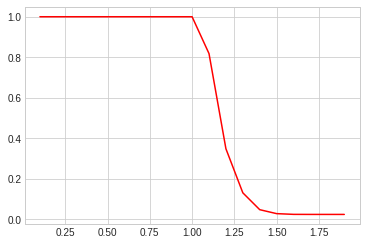

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x = list(precisions.keys())
y = list(precisions.values())

plt.plot(x, y, color='red', label='Precision')

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

In [ ]:
from image_finder import get_matching_images
from image2vect import get_image_vect
predictions = get_matching_images("/content/drive/MyDrive/1200_images/000109.jpg", 2, vect_dict)

current_image = "000109.jpg"


if current_image in training_images:
  image_id = training_images[current_image]
  print("image_id: ", image_id)
  matching_images = inv_training_dict[image_id]
  intersection = list(set(matching_images).intersection(set(predictions)))
  print("intersections: ", len(intersection))
  print("matching_images: ", len(matching_images))
  print("predictions: ", len(predictions))
  precision = len(intersection)/float(len(predictions))
  recall = len(intersection)/float(len(matching_images))
  print("Precision: ", precision, ", Recall: ", recall)

print(inv_training_dict["2880"])
print(len(inv_training_dict["2880"]))

Processing:  /content/drive/MyDrive/1200_images/000109.jpg
Saved to output0.jpg
[[156, 182, 359, 525]]
156 182 359 525
(525, 359, 3)
torch.Size([3, 160, 160])
1197 similar images found
image_id:  3325
intersections:  30
matching_images:  30
predictions:  1197
Precision:  0.02506265664160401 , Recall:  1.0
['000001.jpg', '000404.jpg', '003415.jpg', '004390.jpg', '018062.jpg', '025244.jpg', '027771.jpg', '039393.jpg', '047978.jpg', '049142.jpg', '052385.jpg', '052623.jpg', '053184.jpg', '053311.jpg', '055834.jpg', '058188.jpg', '061431.jpg', '068154.jpg', '084705.jpg', '090937.jpg', '096324.jpg', '100990.jpg', '103728.jpg', '108341.jpg', '110376.jpg', '122439.jpg', '131731.jpg', '134007.jpg', '139106.jpg', '140935.jpg']
30
